In [ ]:
!sudo pip install -U geopandas fiona shapely pyproj geopy pysal descartes

In [ ]:
!sudo apt-get install -y libgeos-dev python3-rtree

In [1]:
import geopandas as gpd

In [ ]:
gpd.datasets.available

In [ ]:
!mkdir data

In [ ]:
# Dataset from NYC Open Data: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq
!curl 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON' -o data/nyc-neighborhoods.geojson

In [2]:
df_nyc = gpd.GeoDataFrame.from_file('data/nyc-neighborhoods.geojson')

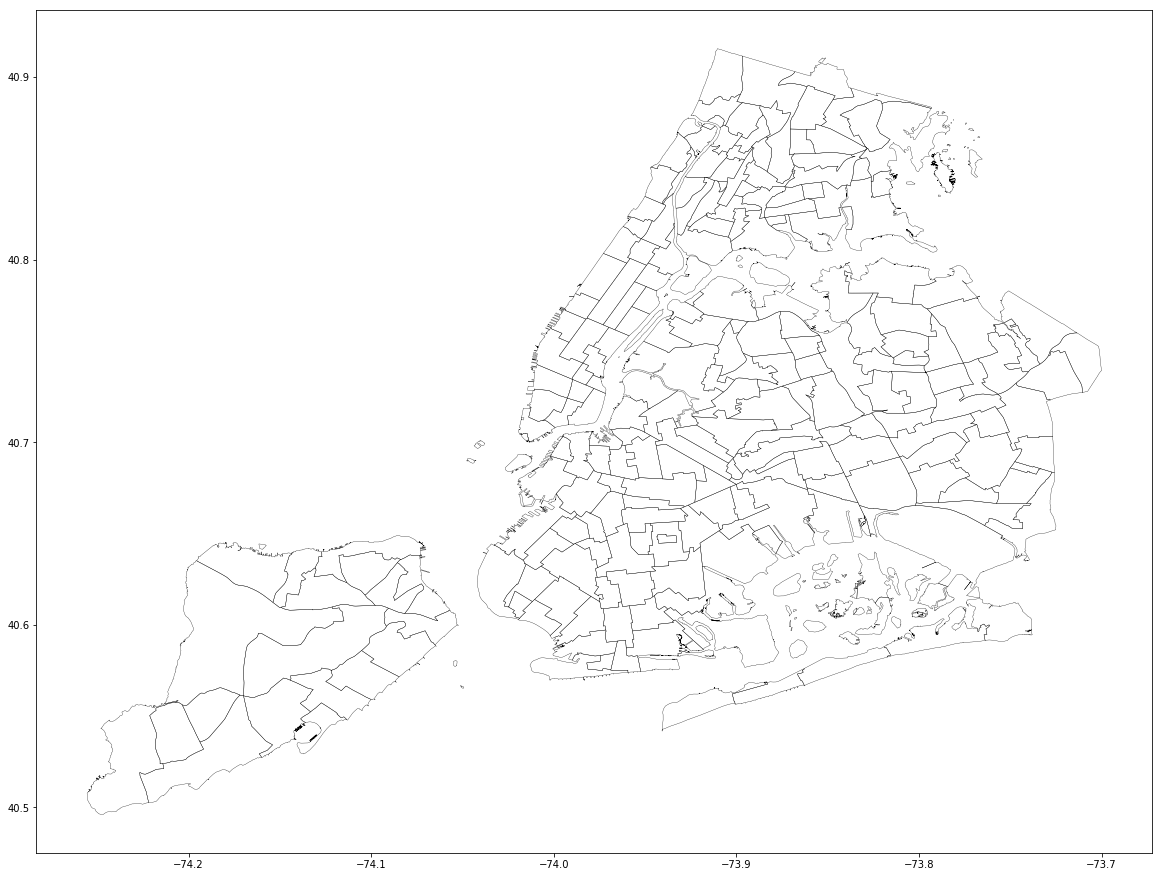

In [3]:
%matplotlib inline
base = df_nyc.plot(figsize=(20,20), linewidth=0.3, color='white')

In [14]:
import requests
import pandas as pd
import numpy as np
url = 'http://www.citibikenyc.com/stations/json'
data = requests.get(url).json()["stationBeanList"]
df = pd.DataFrame(data)
    
df["perc_full"] = np.vectorize(lambda x,y: x/y if y>0 else None)(df['availableBikes'],df['totalDocks'])

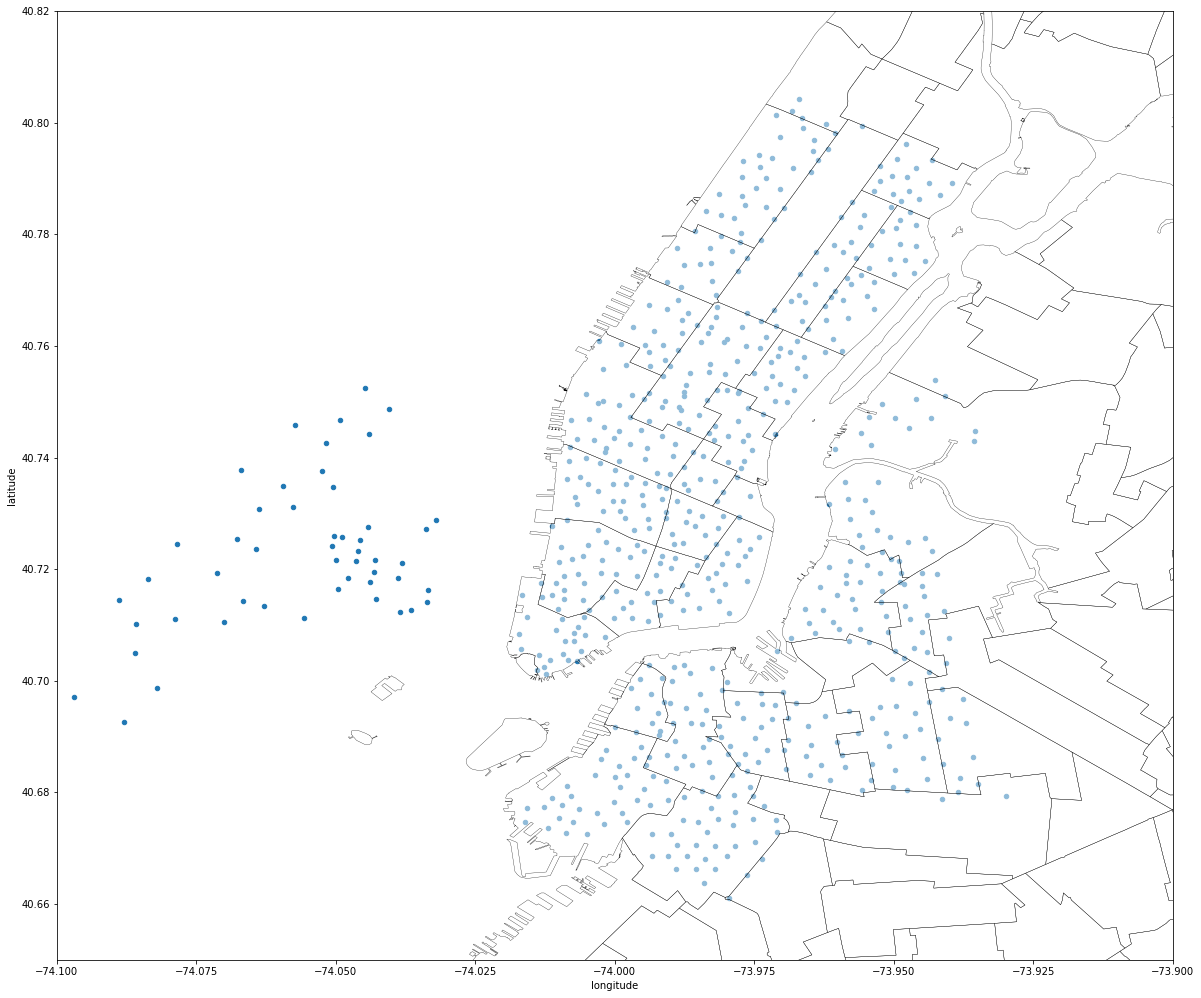

In [8]:
# Example of merging a "regular" Pandas scatterplot with a GeoPandas plot
# using "Method 2" from http://geopandas.org/mapping.html#maps-with-layers

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.set_xlim( (-74.1,-73.9)  )
ax.set_ylim( (40.65, 40.82) )

df_nyc.plot(figsize=(20,20), linewidth=0.3, color='white',ax=ax)
df.plot(kind='scatter', x='longitude', y='latitude', ax=ax, figsize=(20,20))

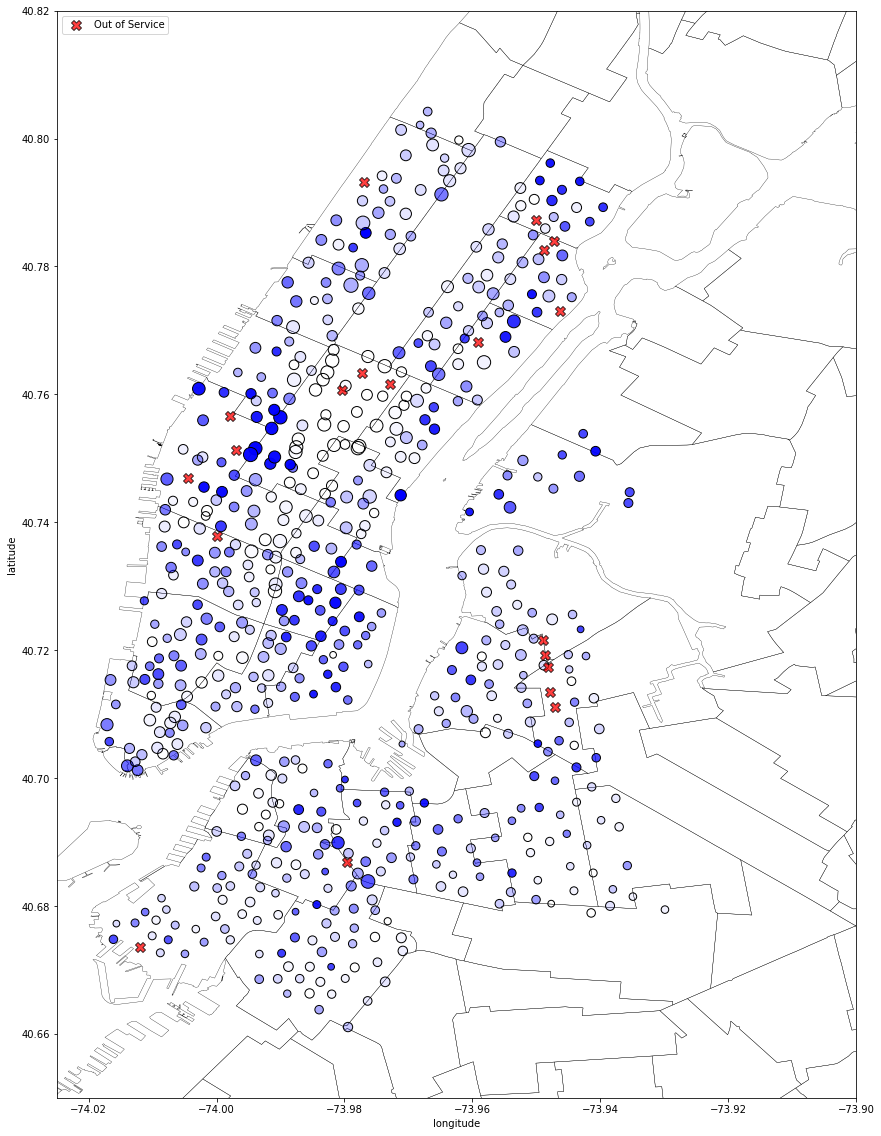

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.set_xlim( (-74.025,-73.9)  )
ax.set_ylim( (40.65  , 40.82) )

# df.plot(kind='scatter', x='longitude', y='latitude', ax=ax, figsize=(20,20))

# And now make the size of each point proportional to the size of available bikes
# using the s option in the plot
inservice = df[df["statusValue"] == 'In Service']
outofservice = df[df["statusValue"] == 'Not In Service']



df_nyc.plot(figsize=(20,20), linewidth=0.3, color='White',ax=ax, alpha = 0.5, zorder=1)



# Following http://stackoverflow.com/questions/26738881/setting-scatter-points-transparency-from-data-array-in-matplotlib-plot
# to set alpha in varying degrees
c = np.asarray([(0, 0, 1, a) for a in inservice['perc_full']])

'''
inservice.plot(ax = ax, kind='scatter',  figsize=(20,20),
                                   x='longitude', 
                                   y='latitude', 
                                   color=c,
                                   edgecolors='DarkBlue',
                                  label='In Service', 
                                  s=2*inservice['totalDocks'])
                                  
'''


plt.scatter(
                               x=inservice['longitude'], 
                               y=inservice['latitude'], 
                               color=c, edgecolors='Black', label='In Service', 
                               # alpha=inservice['perc_full'],
                             s=3*inservice['totalDocks'], zorder=2)


outofservice.plot(ax = ax, kind='scatter',  figsize=(20,20),
                                   x='longitude', 
                                   y='latitude', 
                                  edgecolor = 'Black',
                                   color='Red', marker = 'X',
                                   s = 100, alpha = 0.75,
                                   label = 'Out of Service', zorder=3)

In [ ]:
# More data at https://github.com/dwillis/nyc-maps
!curl -s -L https://raw.githubusercontent.com/dwillis/nyc-maps/master/police_precincts.geojson -o data/nyc_police_precincts.geojson

In [ ]:
df_nyc = gpd.GeoDataFrame.from_file('data/nyc_police_precincts.geojson')
df_nyc.plot(figsize=(20,20), linewidth=0.2)